# Part I - Exploring the Airline On-Time Performance Dataset (1996)
## by Babajide Tobiloba

## Introduction

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays in the year 1996. This database contains scheduled and actual departure and arrival times reported by certified United States air carriers that account for at least 1% of domestic scheduled passenger revenues. The data is collected by the Bureau of Transportation Statistics' Office of Airline Information (BTS).

The columns in the dataset are:
* Year
* Month
* DayofMonth
* DayOfWeek - 1 (Monday) - 7 (Sunday)
* DepTime	- actual departure time (local, hhmm)
* CRSDepTime - scheduled departure time (local, hhmm)
* ArrTime	- actual arrival time (local, hhmm)
* CRSArrTime	- scheduled arrival time (local, hhmm)
* UniqueCarrier -	unique carrier code
* FlightNum -	flight number
* TailNum	- plane tail number
* ActualElapsedTime - in minutes
* CRSElapsedTime - in minutes
* AirTime	- in minutes
* ArrDelay - arrival delay, in minutes
* DepDelay - departure delay, in minutes
* Origin - origin IATA airport code
* Dest - destination IATA airport code
* Distance - in miles
* TaxiIn - taxi in time, in minutes
* TaxiOut - taxi out time in minutes
* Cancelled - was the flight cancelled?
* CancellationCode - reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
* Diverted - 1 = yes, 0 = no
* CarrierDelay - in minutes
* WeatherDelay - in minutes
* NASDelay - in minutes
* SecurityDelay - in minutes
* LateAircraftDelay - in minutes

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset
flight = pd.read_csv(r'C:\Users\USER\Desktop\Data Analysis Career\ALX Nanodegree Program\Project\Data Visualization project\1996.csv')

In [3]:
# view the dataset
print(flight.shape)
print(flight.dtypes)
flight.head()

(5351983, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode     float64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1996,1,29,1,2039.0,1930,2245.0,2139,DL,345,...,6,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1996,1,30,2,1931.0,1930,2142.0,2139,DL,345,...,5,22,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1996,1,31,3,1956.0,1930,2231.0,2139,DL,345,...,7,27,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1996,1,1,1,1730.0,1550,1909.0,1745,DL,411,...,4,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1996,1,2,2,1714.0,1550,1841.0,1745,DL,411,...,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# check the summary statistics
flight.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5351983.0,5.351983e+06,5.351983e+06,5.351983e+06,5.223447e+06,5.351983e+06,5.209326e+06,5.351983e+06,5.351983e+06,5.209326e+06,...,5.351983e+06,5.351983e+06,5.351983e+06,0.0,5.351983e+06,0.0,0.0,0.0,0.0,0.0
mean,1996.0,6.532312e+00,1.574780e+01,3.934272e+00,1.355183e+03,1.322029e+03,1.500954e+03,1.476896e+03,9.949791e+02,1.195761e+02,...,5.481488e+00,1.390044e+01,2.401652e-02,NaN,2.638461e-03,NaN,NaN,NaN,NaN,NaN
std,0.0,3.443942e+00,8.793786e+00,1.994263e+00,4.763363e+02,4.944157e+02,4.959666e+02,5.122419e+02,6.587492e+02,6.711781e+01,...,4.152216e+00,9.527478e+00,1.531004e-01,NaN,5.129815e-02,NaN,NaN,NaN,NaN,NaN
min,1996.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-2.340000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1996.0,4.000000e+00,8.000000e+00,2.000000e+00,9.380000e+02,9.230000e+02,1.121000e+03,1.110000e+03,4.470000e+02,7.000000e+01,...,3.000000e+00,9.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1996.0,7.000000e+00,1.600000e+01,4.000000e+00,1.340000e+03,1.325000e+03,1.528000e+03,1.520000e+03,8.810000e+02,1.020000e+02,...,5.000000e+00,1.200000e+01,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1996.0,1.000000e+01,2.300000e+01,6.000000e+00,1.740000e+03,1.725000e+03,1.921000e+03,1.912000e+03,1.516000e+03,1.510000e+02,...,7.000000e+00,1.700000e+01,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1996.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,3.369000e+03,8.980000e+02,...,5.800000e+02,4.810000e+02,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [5]:
# check the number of unique values in the columns
flight.nunique()

Year                    1
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1435
CRSDepTime           1153
ArrTime              1440
CRSArrTime           1345
UniqueCarrier          10
FlightNum            2812
TailNum              3504
ActualElapsedTime     608
CRSElapsedTime        457
AirTime               576
ArrDelay              861
DepDelay              881
Origin                211
Dest                  212
Distance             1038
TaxiIn                197
TaxiOut               302
Cancelled               2
CancellationCode        0
Diverted                2
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [6]:
# drop rows with missing values
flight = flight.fillna(0)
flight.drop(flight[flight['ArrTime'] == 0].index, inplace = True)
flight.drop(flight[flight['DepTime'] == 0].index, inplace = True)

In [7]:
# convert ArrTime and DepTime to integers
flight['ArrTime'] = flight['ArrTime'].astype(int)
flight['DepTime'] = flight['DepTime'].astype(int)

In [8]:
# drop unnecessary columns
flight.drop(labels = ['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

In [9]:
# drop duplicates if any
flight.drop_duplicates()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1996,1,29,1,2039,1930,2245,2139,DL,345,...,230.0,66.0,69.0,ATL,PHX,1587,6,10,0,0
1,1996,1,30,2,1931,1930,2142,2139,DL,345,...,224.0,3.0,1.0,ATL,PHX,1587,5,22,0,0
2,1996,1,31,3,1956,1930,2231,2139,DL,345,...,241.0,52.0,26.0,ATL,PHX,1587,7,27,0,0
3,1996,1,1,1,1730,1550,1909,1745,DL,411,...,201.0,84.0,100.0,ATL,PHX,1587,4,14,0,0
4,1996,1,2,2,1714,1550,1841,1745,DL,411,...,195.0,56.0,84.0,ATL,PHX,1587,4,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351978,1996,12,6,5,1512,0,1624,0,AA,1885,...,106.0,-12.0,-2.0,ATL,DFW,732,12,14,0,0
5351979,1996,12,7,6,1514,0,1633,0,AA,1885,...,115.0,-3.0,0.0,ATL,DFW,732,11,13,0,0
5351980,1996,12,8,7,1510,0,1650,0,AA,1885,...,129.0,14.0,-4.0,ATL,DFW,732,10,21,0,0
5351981,1996,12,9,1,1513,0,1616,0,AA,1885,...,105.0,-20.0,-1.0,ATL,DFW,732,9,9,0,0


In [10]:
# view the dataset
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1996,1,29,1,2039,1930,2245,2139,DL,345,...,230.0,66.0,69.0,ATL,PHX,1587,6,10,0,0
1,1996,1,30,2,1931,1930,2142,2139,DL,345,...,224.0,3.0,1.0,ATL,PHX,1587,5,22,0,0
2,1996,1,31,3,1956,1930,2231,2139,DL,345,...,241.0,52.0,26.0,ATL,PHX,1587,7,27,0,0
3,1996,1,1,1,1730,1550,1909,1745,DL,411,...,201.0,84.0,100.0,ATL,PHX,1587,4,14,0,0
4,1996,1,2,2,1714,1550,1841,1745,DL,411,...,195.0,56.0,84.0,ATL,PHX,1587,4,8,0,0


### What is the structure of your dataset?

The dataset contains 535,1983 rows organized into 23 columns (since unnecessary columns have been dropped). The majority of the variables are numerical, with only four columns containing letters.
The columns representing time will be left as integers since they serve the purpose of the investigation.


### What is/are the main feature(s) of interest in your dataset?

I am intersted in figuring out the relationship between the elapsed time, distance traveled and if there is any delay in arrival or departure. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The most important features in this dataset for my investigation are the arrival and departure times, as well as the arrival and departure delay. I am also expecting to see a positive relationship between distance and elapsed time.

## Univariate Exploration

First, I will take a look at the months with the highest number of flights:


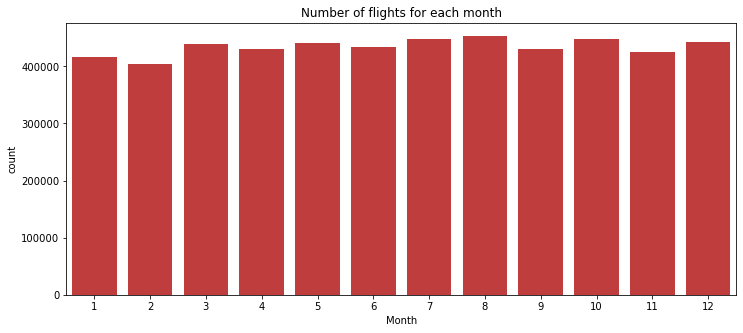

In [11]:
# set color palettes
color1 = sb.color_palette()[0]
color2 = sb.color_palette()[3]

# bar chart for count of months
plt.figure(figsize = [12,5])
sb.countplot(data = flight, x = 'Month', color = color2);
plt.xlabel('Month')
plt.title('Number of flights for each month')
plt.show()

There is a fairly uniform distribution for the number of flights taken in each month of the year 1996 with no month having exceptionally high nor low total values. However, August has the highest number of flights and February has the lowest number of flights.

Next, let us check the days of the week with the highest number of flights:

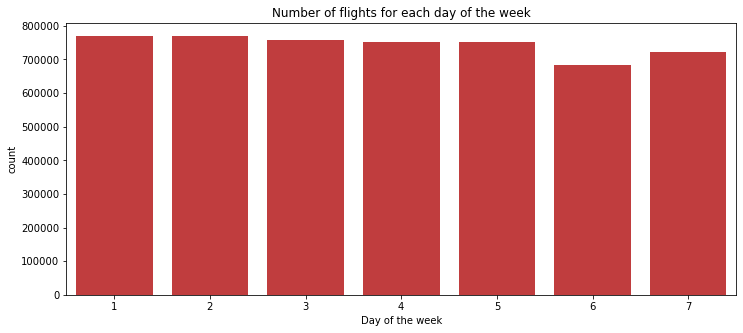

In [12]:
# bar chart for count of days of the week
plt.figure(figsize = [12,5])
sb.countplot(data = flight, x = 'DayOfWeek', color = color2);
plt.xlabel('Day of the week')
plt.title('Number of flights for each day of the week')
plt.show()

There is also a fairly uniform distribution for the number of flights for each day of the week in the year 1996 with the first two days of the week having the highest and the last two days of the week having the lowest.

Next, let us check the distribution of departure times through the day:

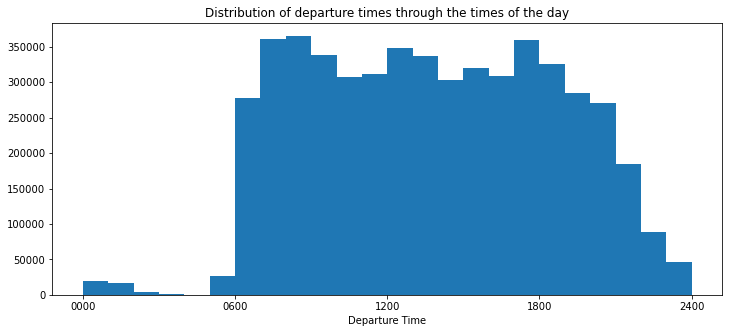

In [13]:
# Plot histogram for Departure time
plt.figure(figsize = [12,5])
ticks = [0, 600, 1200, 1800,2400]
labels = ['0000', '0600', '1200', '1800', '2400']
bins = np.arange(0,flight.DepTime.max() + 100, 100)
plt.xticks(ticks,labels)
plt.hist(data = flight, x ='DepTime', color = color1, bins = bins);
plt.xlabel('Departure Time')
plt.title('Distribution of departure times through the times of the day')
plt.show()

We see that at early times of the day, there are much fewer flight departures compared to other times of the day from 0600 to 2400.

Next, let us check the distribution of arrival times through the day:

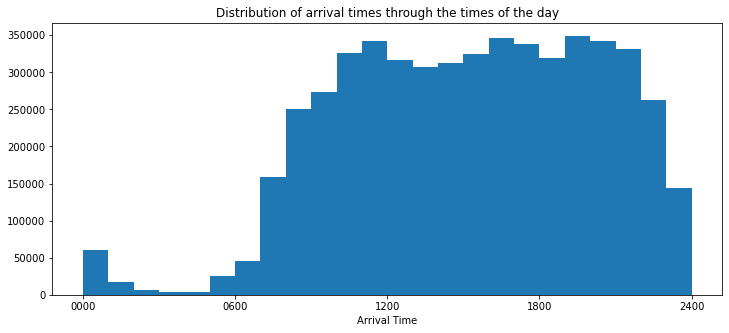

In [14]:
# plot histogram for Arrival time
plt.figure(figsize = [12,5])
ticks = [0, 600, 1200, 1800,2400]
labels = ['0000','0600','1200','1800','2400']
bins = np.arange(0,flight.ArrTime.max() + 100, 100)
plt.xticks(ticks,labels)
plt.hist(data = flight, x = 'ArrTime', color = color1, bins = bins);
plt.xlabel('Arrival Time')
plt.title('Distribution of arrival times through the times of the day')
plt.show()

The distribution is very similar to that of the departure times with most of the flights arriving after 0600.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the visualizations above, we see that most flights occur after 0600 and before 2400 during the day with weekends having the fewest flights.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions. All the plots were as expected. For the histograms, the bins were determined using the maximum values of the column and were divided into hourly measurements (24 in total)

## Bivariate Exploration

First, let us determine the relationhsip between elapsed time and distance:

In [15]:
# define a function for scatterplots
def sca(f, a, b, c, d, e):
    plt.figure(figsize = [20,10])
    plt.scatter(data = f, x = a, y = b, alpha = 0.2, marker = '.');
    plt.xlabel(c)
    plt.ylabel(d)
    plt.title(e)

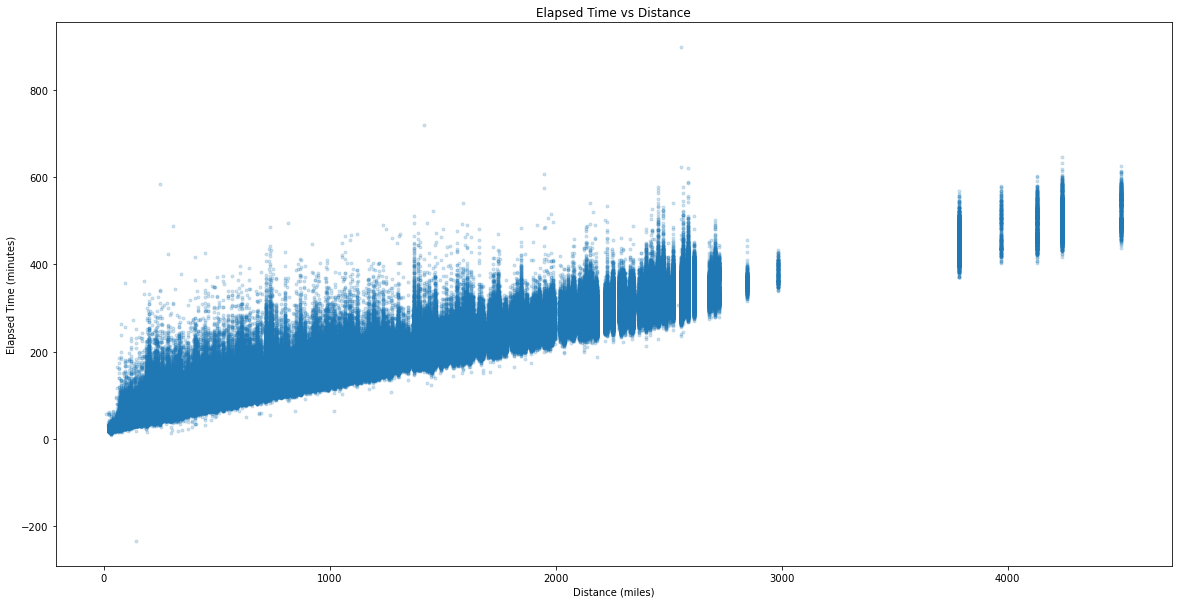

In [16]:
# Plot scattterplot for actualelapsedtime and distance
sca(flight,'Distance', 'ActualElapsedTime', 'Distance (miles)', 'Elapsed Time (minutes)', 'Elapsed Time vs Distance')

Notice that there is a plotted value for which elapsed time is less than 0 and there are outliers for ActualElapsedTime above 600.
Let us fix that by setting limits:

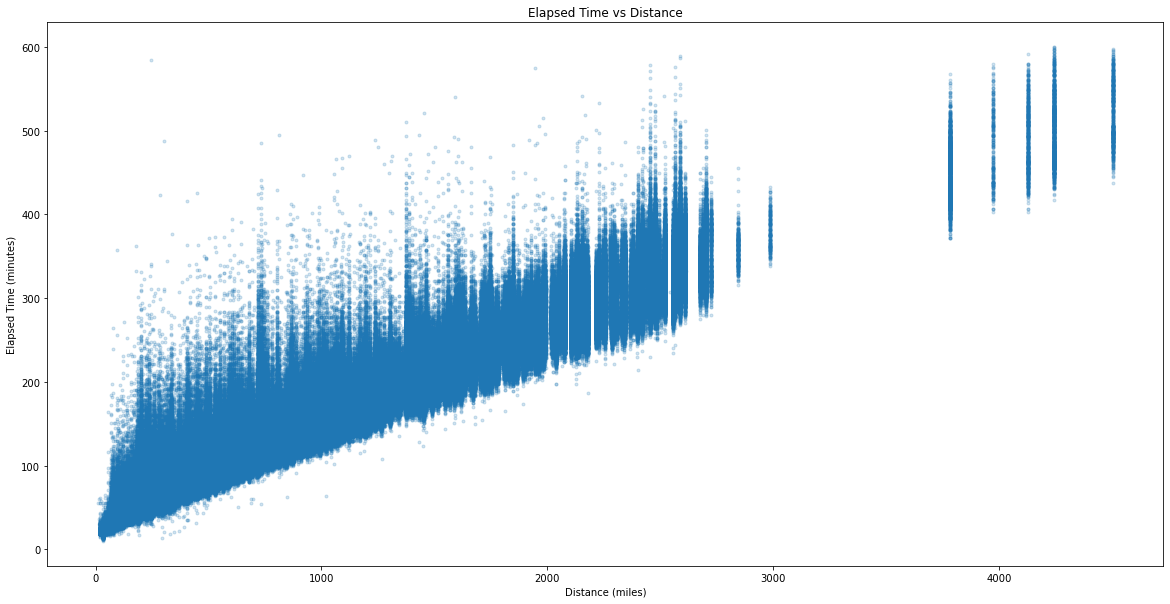

In [17]:
# set the limits
flight1 = flight[flight['ActualElapsedTime'] >= 0]
flight1 = flight1[flight1['ActualElapsedTime'] <=600]

# Plot scattterplot for actualelapsedtime and distance
sca(flight1,'Distance', 'ActualElapsedTime', 'Distance (miles)', 'Elapsed Time (minutes)', 'Elapsed Time vs Distance')

We notice that for distance greater than 3000 miles, there are much less data points than below 3000 miles. So, let us set new limits:

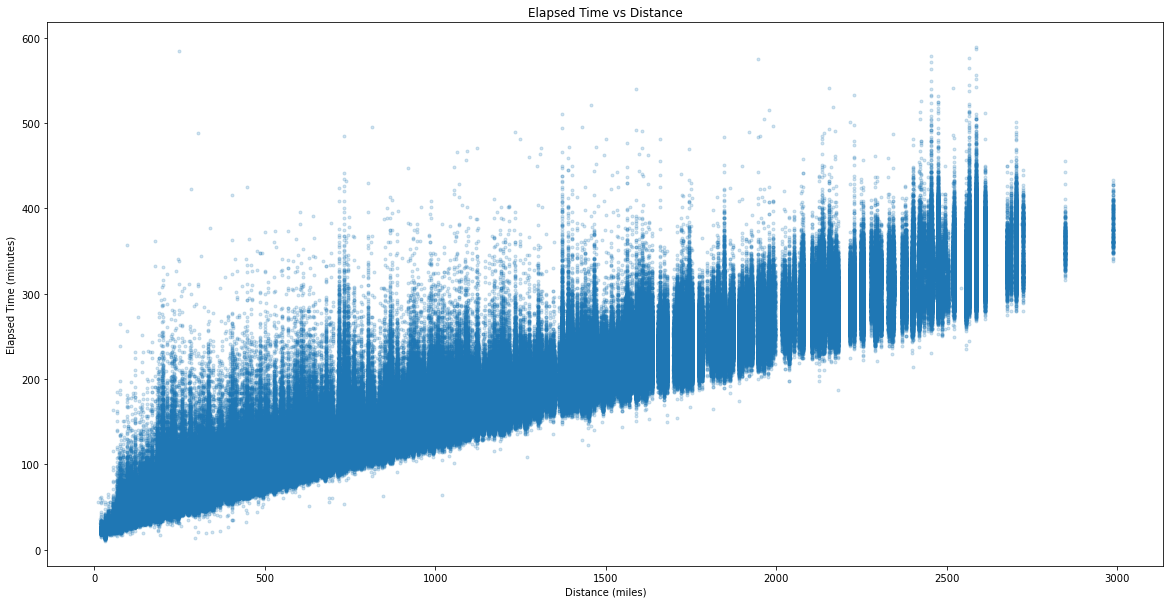

In [18]:
# set the limit
flight1 = flight1[flight1['Distance']<=3000]

# Plot scattterplot for actualelapsedtime and distance
sca(flight1,'Distance', 'ActualElapsedTime', 'Distance (miles)', 'Elapsed Time (minutes)', 'Elapsed Time vs Distance')

As expected, there is a positive relationship between the distance traveled and the elapsed time.

Now, let us look at the pairwise correlation between ArrTime, DepTime, ArrDelay, DepDelay and Distance using a correlation plot:

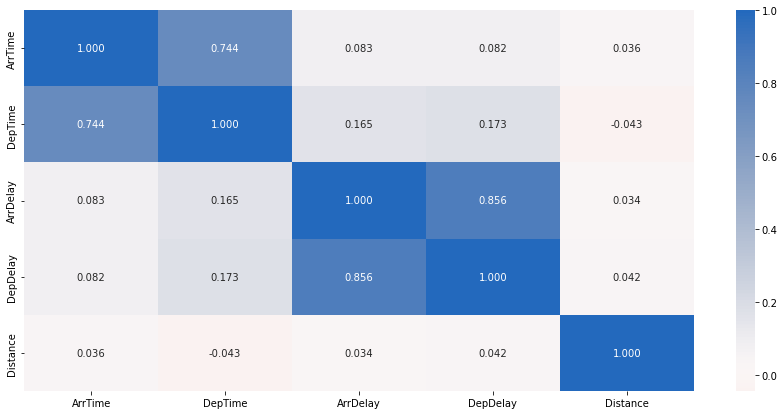

In [19]:
# correlation plot
plt.figure(figsize = [15, 7])
values = ['ArrTime', 'DepTime', 'ArrDelay', 'DepDelay', 'Distance']
sb.heatmap(flight[values].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

We see from the plot above that the departure time of flights highly correlates with the arrival time of the flights. Also, the Arrival Delay highly correlates with Deparure Delay but the rest of the relationships between the variables do not show any significant correlations.

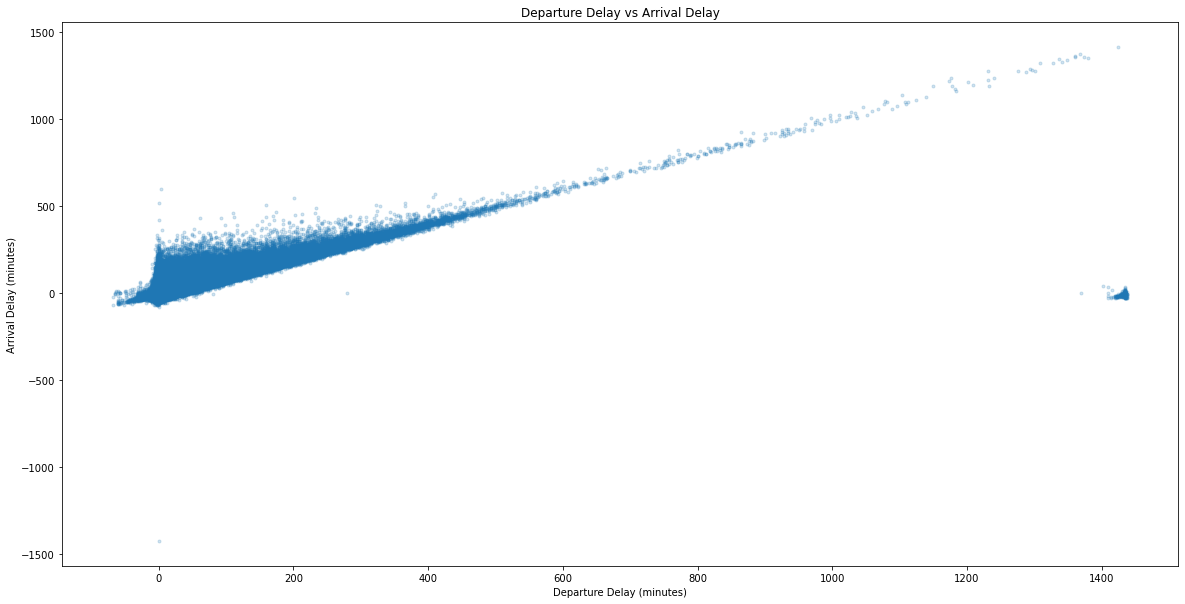

In [20]:
# scatterplot of DepDelay vs ArrDelay
sca(flight, 'DepDelay', 'ArrDelay', 'Departure Delay (minutes)', 'Arrival Delay (minutes)', 'Departure Delay vs Arrival Delay')

Let us set limits to refine the look of the graph by considering DepDelay time less than or equal to 1000 minutes and ArrDelay time greater than or equal to 0:

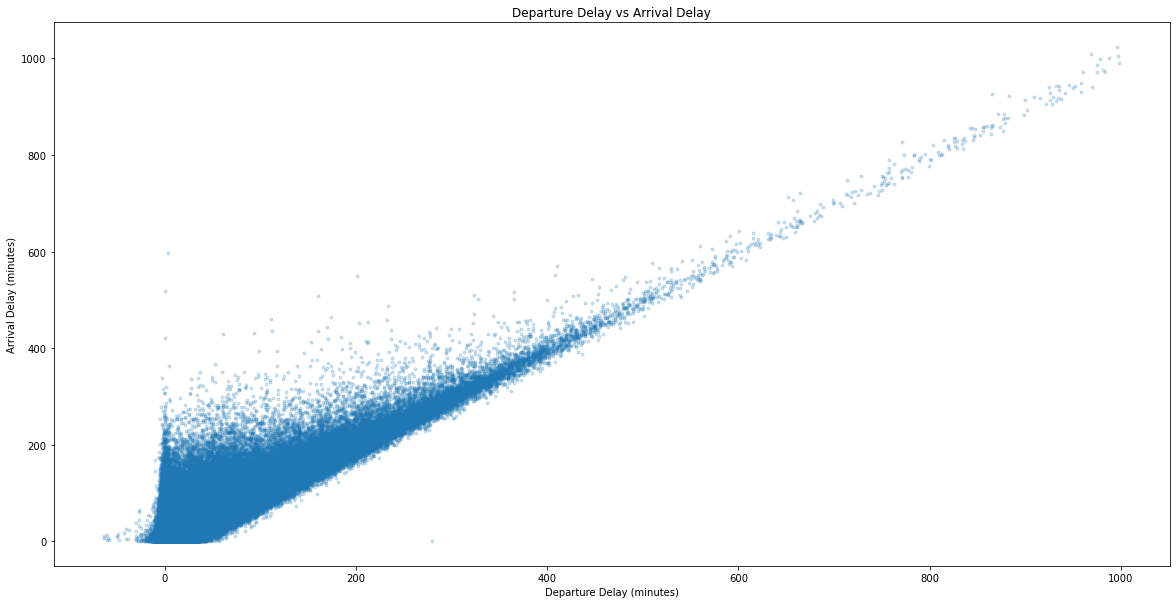

In [21]:
# set the limit
flight1 = flight[flight['ArrDelay'] >= 0]
flight1 = flight1[flight1['DepDelay'] <= 1000]

# plot the scatter plot
sca(flight1, 'DepDelay', 'ArrDelay', 'Departure Delay (minutes)', 'Arrival Delay (minutes)', 'Departure Delay vs Arrival Delay')

There appears to be a very positive relationship between the departure delay and arrival delay with the majority of the delay falling below 400 minutes.

Now, let us look at the relationship between ArrTime and DepTime and day of the week:

<AxesSubplot:xlabel='DayOfWeek', ylabel='ArrTime'>

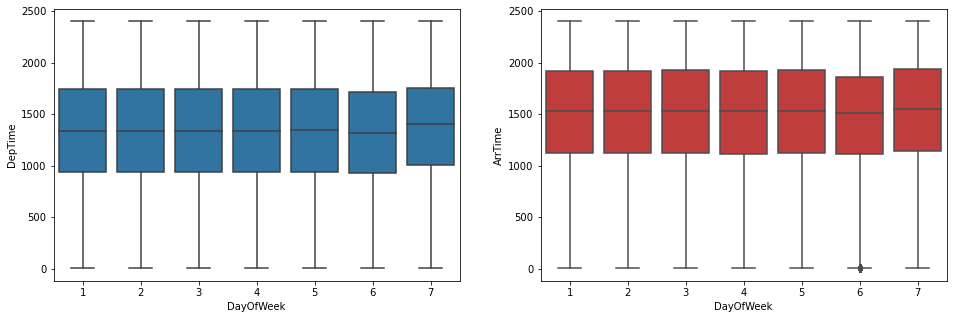

In [22]:
# figure size
plt.figure(figsize = [16, 5])

# subplot 1 for DepTime
plt.subplot(1, 2, 1)
sb.boxplot(data = flight, x = 'DayOfWeek', y = 'DepTime', color = color1)

# subplot 2 for ArrTime
plt.subplot(1, 2, 2)
sb.boxplot(data = flight, x = 'DayOfWeek', y = 'ArrTime', color = color2)

There appears to be a uniform distrbution between both Departure Time and Arrival Time with day of the week with all days of the week having approximately the same median arrival and departure times.

Now, let us look at the relationship between DepDelay and ArrTime and DayOfWeek:

<AxesSubplot:xlabel='DayOfWeek', ylabel='ArrDelay'>

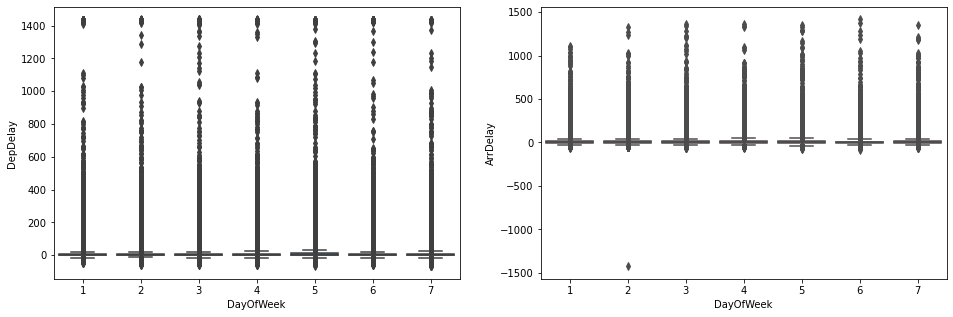

In [23]:
# figure size
plt.figure(figsize = [16, 5])

# subplot 1 for DepTime
plt.subplot(1, 2, 1)
sb.boxplot(data = flight, x = 'DayOfWeek', y = 'DepDelay', color = color1)

# subplot 2 for ArrTime
plt.subplot(1, 2, 2)
sb.boxplot(data = flight, x = 'DayOfWeek', y = 'ArrDelay', color = color2)

From the box plot above there are many outliers in both Departure delay and Arrival delay, so, we have to set limits:

In [24]:
# set the limits
flight2 = flight[flight['DepDelay']<=50]
flight2 = flight2[flight2['DepDelay']>=0]
flight2 = flight2[flight2['ArrDelay']<=50]
flight2 = flight2[flight2['ArrDelay']>=0]

Now, plot the boxplots again:

<AxesSubplot:xlabel='DayOfWeek', ylabel='ArrDelay'>

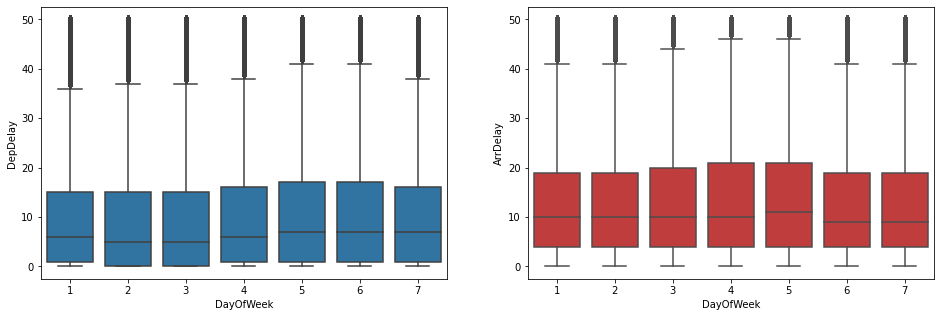

In [25]:
# figure size
plt.figure(figsize=[16,5])

# subplot 1 for DepTime
plt.subplot(1, 2, 1)
sb.boxplot(data = flight2, x = 'DayOfWeek', y = 'DepDelay', color = color1)

# subplot 2 for ArrTime
plt.subplot(1, 2, 2)
sb.boxplot(data = flight2, x = 'DayOfWeek', y = 'ArrDelay', color = color2)

With a closer look at the plot, we see that the departure delay has a median of approximately 6 minutes for most days of the week and the arrival delay has a median of approximately 10 minutes for most days of the week.


Let us now take a closer look at the relationship between AirTime and Distance:

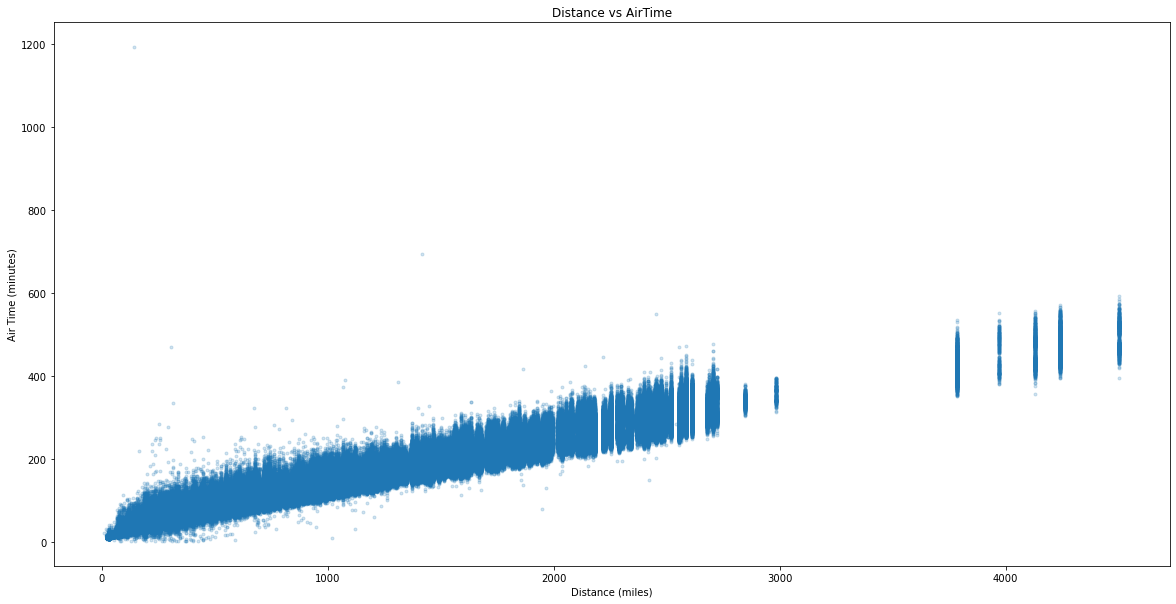

In [26]:
# Plot scattterplot for AirTime and Distance
sca(flight, 'Distance', 'AirTime', 'Distance (miles)', 'Air Time (minutes)', 'Distance vs AirTime')

There seem to be outliers, so let us zoom in by setting limits:

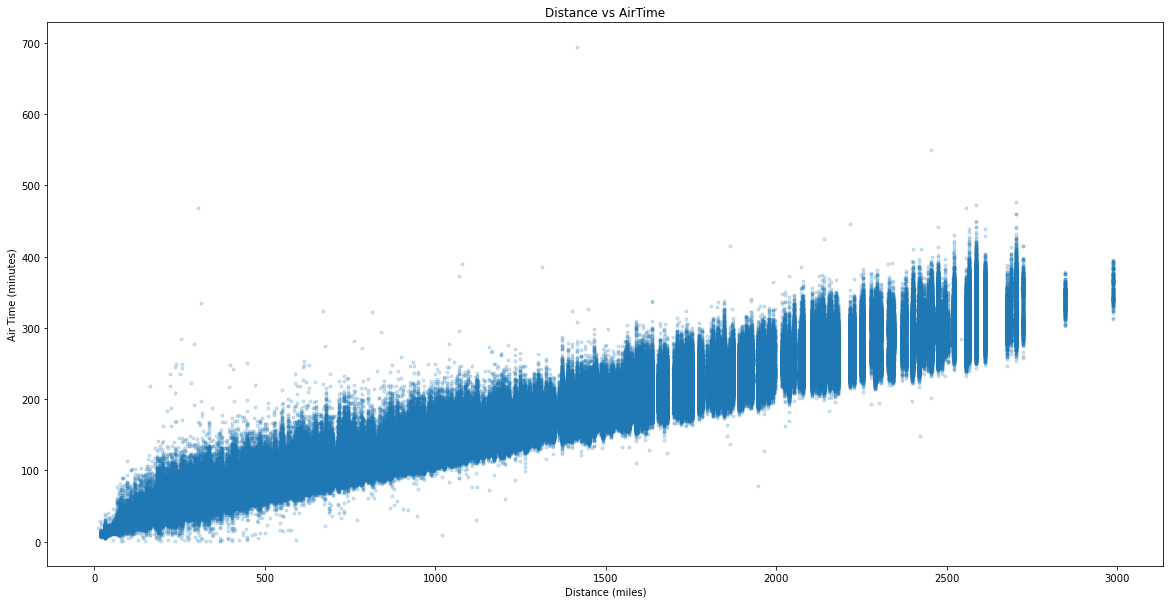

In [27]:
# set the limits
flight4 = flight[flight['AirTime'] <= 700]
flight4 = flight4[flight4['Distance'] <= 3000]

# Plot scattterplot for AirTime and Distance
sca(flight4, 'Distance', 'AirTime', 'Distance (miles)', 'Air Time (minutes)', 'Distance vs AirTime')

As expected, there is a positive relationship between the distance traveled by the plane and the airtime.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


> From the plots, we see that the day of the week do not have any noticeable impact on whether there is a delay in departure or arrival. However, as expected, there is a positive relationship between the distance traveled and the elapsed time and airtime.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was nothing noteworthy.

## Multivariate Exploration

> Let us take a look at the relationship between Distance and Elapsed Time for each Unique Carrier

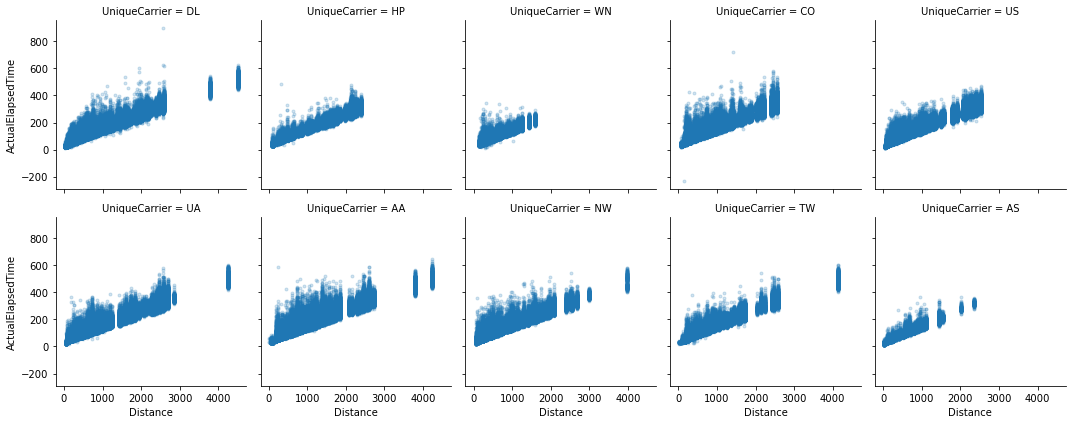

In [28]:
# plot a grid of scatter plots based on unique carriers
g = sb.FacetGrid(data = flight, col = 'UniqueCarrier', col_wrap = 5, margin_titles = True)
g.map(plt.scatter, 'Distance', 'ActualElapsedTime', alpha = 0.2, marker = '.')

There is a data point below 0 miles on the ActualElapsedTime axis for one of the Carriers so, let us set limits. We will also set limits for distance:

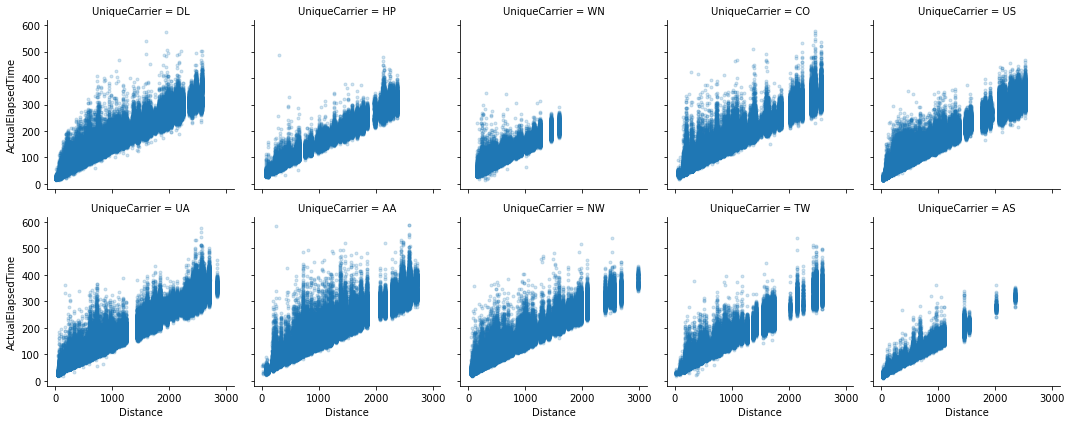

In [29]:
# set the limit
flight6 = flight[flight['ActualElapsedTime'] >= 0]
flight6 = flight6[flight6['ActualElapsedTime'] <= 600]
flight6 = flight6[flight6['Distance'] <= 3000]

# plot the grid
g = sb.FacetGrid(data = flight6, col = 'UniqueCarrier', col_wrap = 5, margin_titles = True)
g.map(plt.scatter, 'Distance', 'ActualElapsedTime', alpha = 0.2, marker = '.')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For all the carriers, the relationship was as expected. There is a positive relationship between the distance traveled and the elapsed time. However, we see that a few of the carriers do not travel to far distances (WN and AS for example) like the others.

### Were there any interesting or surprising interactions between features?

> There really were no surprises. The relationship and interactions were as expected.

## Conclusions
> In this investigation, I set out to look at the relationships between distance traveled and elapsed time and their interactions with some other variables. From my findings, the total number of flights seem to be uniformly distributed across days of the week and months of the year.
There was also a positive relationship between the distance traveled and the elapsed time, and this was the same for all the airline carriers.
There were no surprise or interesting observations. One variable that would have been interesting to invetigate was Cancelled, but there is no data enough to do that.